Calculated Credit Eligibility: 0.00%


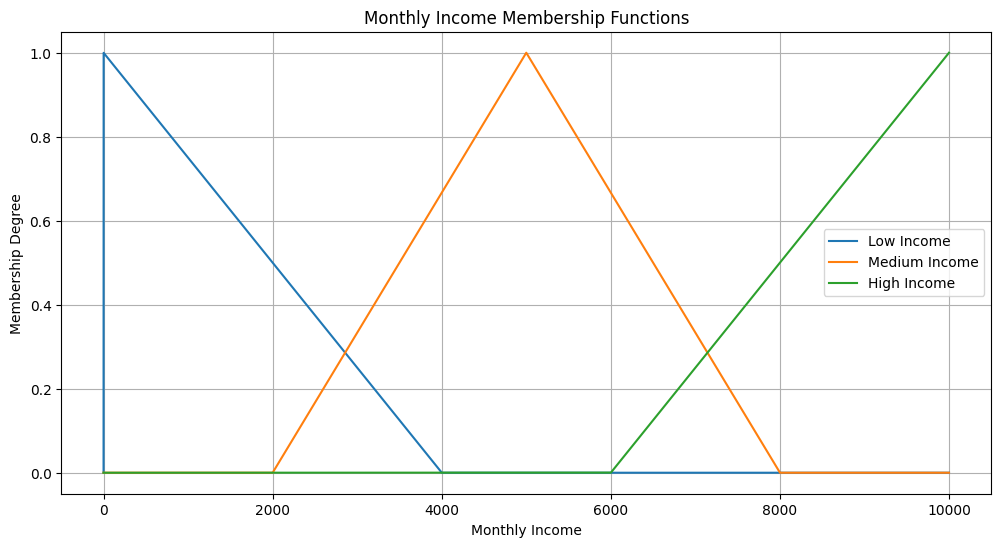

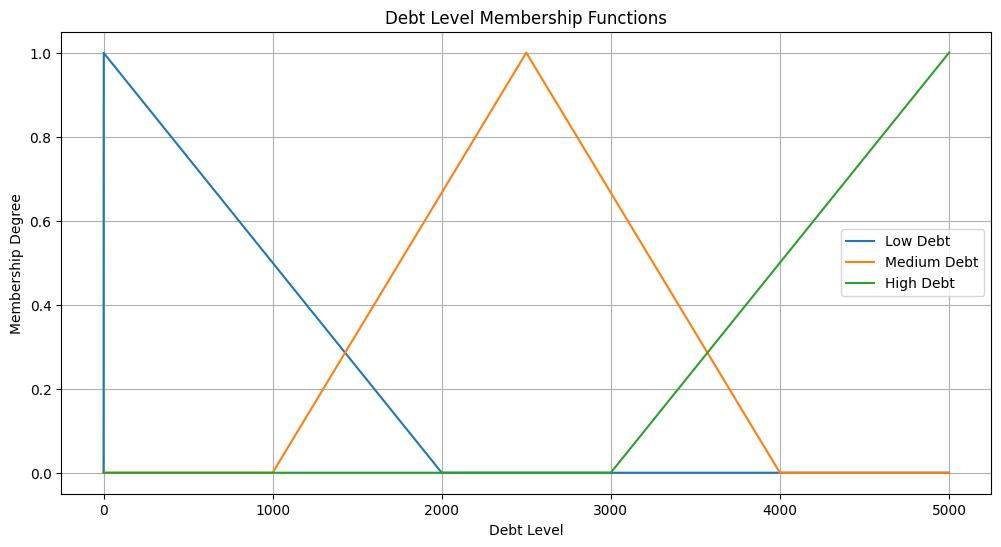

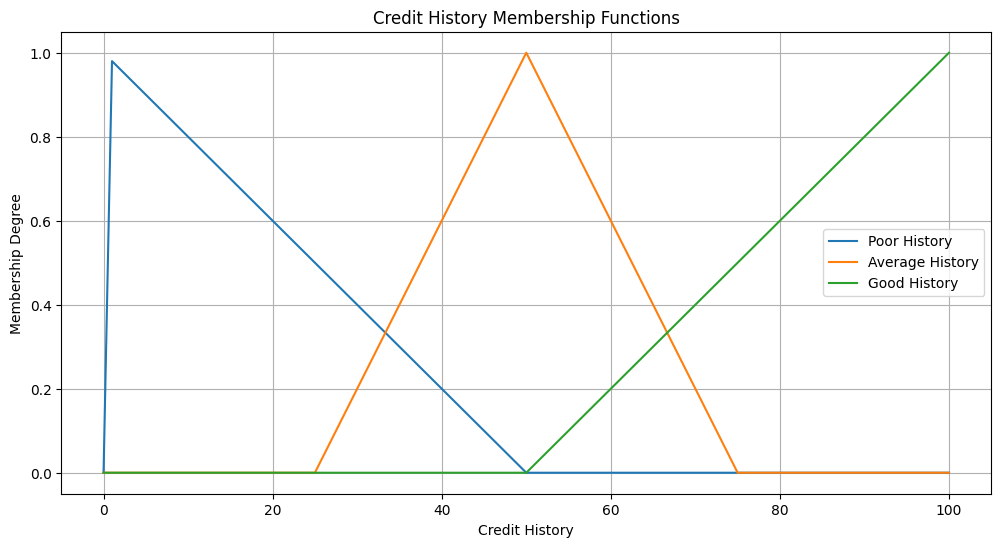

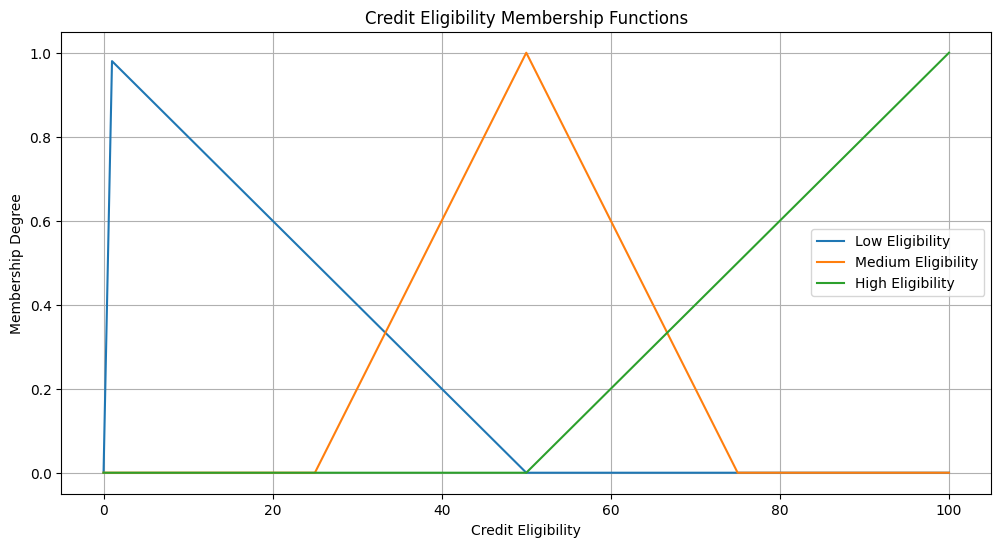

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define fuzzy variables for Tsukamoto Method
class FuzzyVariable:
    def __init__(self, name, universe, membership_functions):
        self.name = name
        self.universe = universe
        self.membership_functions = membership_functions

    def fuzzify(self, value):
        memberships = {}
        for label, func in self.membership_functions.items():
            memberships[label] = func(value)
        return memberships

# Membership functions for triangular shapes
def triangular(a, b, c):
    def func(x):
        if a <= x <= b:
            return (x - a) / (b - a) if b - a != 0 else 0
        elif b <= x <= c:
            return (c - x) / (c - b) if c - b != 0 else 0
        return 0
    return func

# Define the fuzzy variables
monthly_income = FuzzyVariable(
    "monthly_income",
    universe=np.arange(0, 10001, 1),
    membership_functions={
        "low": triangular(0, 0, 4000),
        "medium": triangular(2000, 5000, 8000),
        "high": triangular(6000, 10000, 10000),
    },
)

debt_level = FuzzyVariable(
    "debt_level",
    universe=np.arange(0, 5001, 1),
    membership_functions={
        "low": triangular(0, 0, 2000),
        "medium": triangular(1000, 2500, 4000),
        "high": triangular(3000, 5000, 5000),
    },
)

credit_history = FuzzyVariable(
    "credit_history",
    universe=np.arange(0, 101, 1),
    membership_functions={
        "poor": triangular(0, 0, 50),
        "average": triangular(25, 50, 75),
        "good": triangular(50, 100, 100),
    },
)

credit_eligibility = FuzzyVariable(
    "credit_eligibility",
    universe=np.arange(0, 101, 1),
    membership_functions={
        "low": triangular(0, 0, 50),
        "medium": triangular(25, 50, 75),
        "high": triangular(50, 100, 100),
    },
)

# Define rules for Tsukamoto method
rules = [
    ("low", "high", "poor", "low"),
    ("medium", "medium", "average", "medium"),
    ("high", "low", "good", "high"),
    ("medium", "low", "good", "medium"),
    ("low", "medium", "average", "low"),
    ("high", "medium", "average", "medium"),
    ("high", "high", "poor", "low"),
]

def apply_rule(income, debt_value, history, rule):
    income_level, debt_level_label, history_level, eligibility_level = rule

    income_membership = monthly_income.fuzzify(income)[income_level]
    debt_membership = debt_level.fuzzify(debt_value)[debt_level_label]
    history_membership = credit_history.fuzzify(history)[history_level]

    firing_strength = min(income_membership, debt_membership, history_membership)

    if firing_strength > 0:
        eligibility_value = defuzzify(eligibility_level, firing_strength)
        return firing_strength, eligibility_value
    return 0, 0

def defuzzify(level, firing_strength):
    if level == "low":
        return 25 + (25 * firing_strength)
    elif level == "medium":
        return 50 + (25 * firing_strength)
    elif level == "high":
        return 75 + (25 * firing_strength)
    return 0

def tsukamoto(income, debt_value, history):
    weighted_sum = 0
    total_firing_strength = 0

    for rule in rules:
        firing_strength, value = apply_rule(income, debt_value, history, rule)
        weighted_sum += firing_strength * value
        total_firing_strength += firing_strength

    return weighted_sum / total_firing_strength if total_firing_strength > 0 else 0

# Example: Simulate for monthly income 7000, debt 3000, and credit history 80
result = tsukamoto(7000, 3000, 80)
print(f"Calculated Credit Eligibility: {result:.2f}%")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(monthly_income.universe, [monthly_income.fuzzify(x)["low"] for x in monthly_income.universe], label="Low Income")
plt.plot(monthly_income.universe, [monthly_income.fuzzify(x)["medium"] for x in monthly_income.universe], label="Medium Income")
plt.plot(monthly_income.universe, [monthly_income.fuzzify(x)["high"] for x in monthly_income.universe], label="High Income")
plt.title("Monthly Income Membership Functions")
plt.xlabel("Monthly Income")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(debt_level.universe, [debt_level.fuzzify(x)["low"] for x in debt_level.universe], label="Low Debt")
plt.plot(debt_level.universe, [debt_level.fuzzify(x)["medium"] for x in debt_level.universe], label="Medium Debt")
plt.plot(debt_level.universe, [debt_level.fuzzify(x)["high"] for x in debt_level.universe], label="High Debt")
plt.title("Debt Level Membership Functions")
plt.xlabel("Debt Level")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(credit_history.universe, [credit_history.fuzzify(x)["poor"] for x in credit_history.universe], label="Poor History")
plt.plot(credit_history.universe, [credit_history.fuzzify(x)["average"] for x in credit_history.universe], label="Average History")
plt.plot(credit_history.universe, [credit_history.fuzzify(x)["good"] for x in credit_history.universe], label="Good History")
plt.title("Credit History Membership Functions")
plt.xlabel("Credit History")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(credit_eligibility.universe, [credit_eligibility.fuzzify(x)["low"] for x in credit_eligibility.universe], label="Low Eligibility")
plt.plot(credit_eligibility.universe, [credit_eligibility.fuzzify(x)["medium"] for x in credit_eligibility.universe], label="Medium Eligibility")
plt.plot(credit_eligibility.universe, [credit_eligibility.fuzzify(x)["high"] for x in credit_eligibility.universe], label="High Eligibility")
plt.title("Credit Eligibility Membership Functions")
plt.xlabel("Credit Eligibility")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()
